# Random Matrix Music Maker

### Daniel Jordán

Remote.Python.Pizza 2020 🍕

## About me
* I'm from Peru 🇵🇪
* Studied classical guitar 🎵 & physics ⚛️
* Musical influences:  `numpy.random`  module
* github.com/danj

In [1]:
ls *.wav

funny_bass.wav  test_b.wav  wave1.wav          wave2.wav  wave4.wav  wave6.wav
test_a.wav      test_c.wav  wave2_tonotes.wav  wave3.wav  wave5.wav


In [2]:
rm *.wav

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Audio

np.random.seed(513565)
cmap = plt.cm.inferno

In [4]:
def matrix_to_latex(mat, maxrows= None, maxcols=None, maxdecimals='3'):
    flt = (mat.dtype == float)
    rowend, colend = False, False
    if maxrows:
        irange = maxrows
        rowend = True
    if maxcols:
        jrange = maxcols
        colend = True
    if not maxrows and not maxcols:
        irange, jrange = mat.shape
    matstr = r"\begin{bmatrix}"
    for i in range(irange):
        for j in range(jrange):
            if flt:
                matstr += '{0:.{1}f}'.format(mat[i,j], maxdecimals)
            else:
                matstr += '{}'.format(mat[i,j])
            
            if j<jrange-1:
                matstr += '&'
        if colend:
            if i==0:
                matstr += '&\cdots'
            else:
                matstr += '&'
        if i<irange-1:
            matstr += r'\\'
    if rowend:
        matstr += r'\\\vdots' + '&'*jrange + r'\ddots'
    matstr += '\end{bmatrix}'
    return matstr
#

def printmatrix(mat, maxrows=None, maxcols=None, maxdecimals='3', colorbar=True, title=None):
    display(Math(matrix_to_latex(mat, maxrows, maxcols, maxdecimals)))
    _ = plt.imshow(mat, cmap=plt.cm.inferno)
    if colorbar:
        _ = plt.colorbar()
    if title:
        _ = plt.title(title)
    _ = plt.axis('off')

# Origin story (of this project)

* Needed lists of random numbers for master's thesis
* Started playing around with 2D arrays of random numbers

<IPython.core.display.Math object>

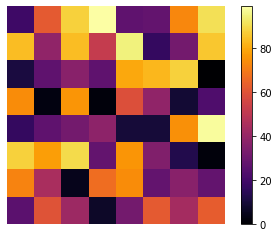

In [5]:
A = np.random.randint(100, size=(8,8))
printmatrix(A)

* Raising the matrix to the *n-th* power:  

$$A^n = \underbrace{A \times A \times \dots \times A}_{n-times}$$

In [6]:
pwrs = [2,3,4,5,6,7,8]
Apwr = {}
for pwr in pwrs:
    Apwr[pwr] = np.linalg.matrix_power(A, pwr)

<IPython.core.display.Math object>

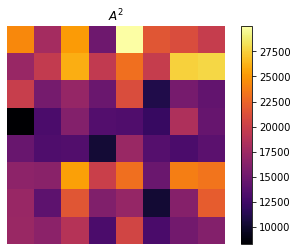

In [7]:
n = 2
printmatrix(Apwr[n], title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

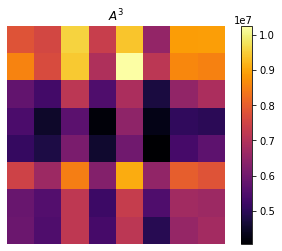

In [8]:
n = 3
printmatrix(Apwr[n], 4, 4, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

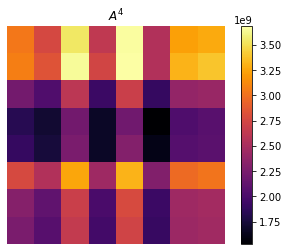

In [9]:
n = 4
printmatrix(Apwr[n], 4, 4, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

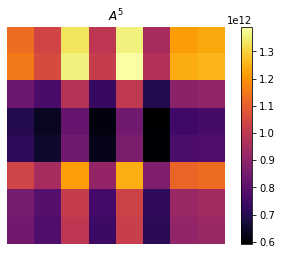

In [10]:
n = 5
printmatrix(Apwr[n], 3, 3, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

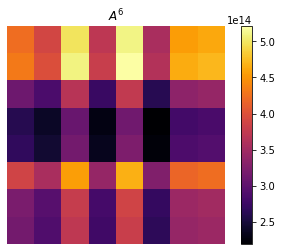

In [11]:
n = 6
printmatrix(Apwr[n], 3, 3, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

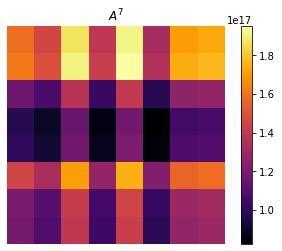

In [12]:
n = 7
printmatrix(Apwr[n], 2, 2, title='$A^{'+str(n)+'}$')

$\star$ We've reached a *steady state*!... but *why?*

* Except...

<IPython.core.display.Math object>

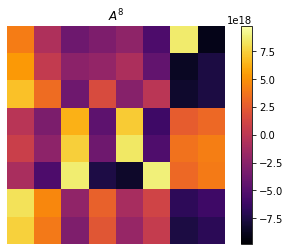

In [13]:
n = 8
printmatrix(Apwr[n], 2, 2, title='$A^{'+str(n)+'}$')

OVERFLOW!

* Relative magnitudes are important

<IPython.core.display.Math object>

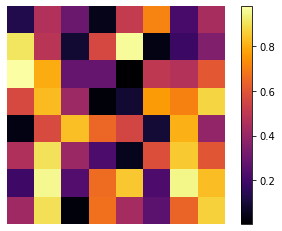

In [14]:
A = np.random.random(size=(8,8))
printmatrix(A)

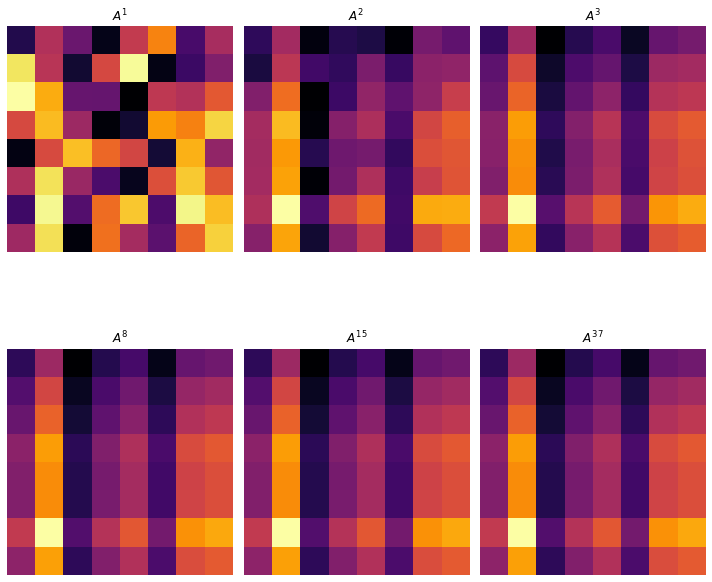

In [15]:
pwrs = np.array([[1,2,3],[8,15,37]])

fig, axs = plt.subplots(pwrs.shape[0],pwrs.shape[1], figsize=(10,10))

for i in range(pwrs.shape[0]):
    for j in range(pwrs.shape[1]):
        Apwr = np.linalg.matrix_power(A, pwrs[i,j])
        Apwr /= Apwr.max()
        axs[i,j].imshow(Apwr, cmap=cmap)
        axs[i,j].set_title('$A^{'+str(pwrs[i,j])+'}$')
        axs[i,j].axis('off')
fig.tight_layout()

* Same matrix to various powers

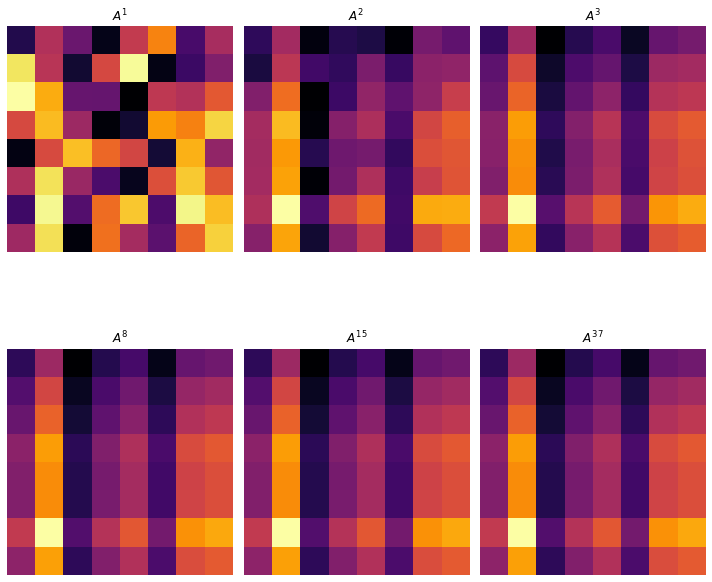

In [16]:
fig

## And now, music?

* Pattern similar to a *step sequencer*
* Each square button is a tone

![Arturia Step sequencer](presentation_files/arturia480.jpg)

* Similar to a $4\times4$ matrix

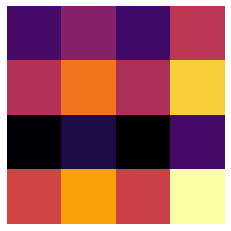

In [17]:
A = np.random.random(size=(4,4))
fig, ax = plt.subplots()
ax.imshow(np.linalg.matrix_power(A, 10), cmap=cmap)
_ = ax.axis('off')

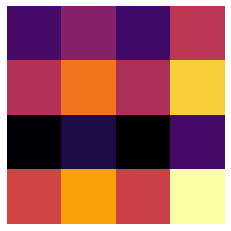

In [18]:
fig #4x4 matrix to the 10th power

* I followed tutorials by Alicia Key (github.com/akey7)
    * Used `sounddevice` module
        * Created `Random Matrix Music Maker`($RM^3$):
            * (Apologies to those with Perfect Pitch)

In [19]:
from rm3 import rm3
wave = rm3()
wave.play()

wave.save('wave1.wav')

display(Audio('wave1.wav'))

* A tool for musical inspiration

[[812.00040874 701.1679452  578.13058906 566.43540346]
 [587.32008402 504.75173227 413.09101224 404.37808286]
 [348.49000064 295.96579508 237.65778236 232.11509142]
 [421.84275582 360.0910058  291.53937469 285.02293635]]


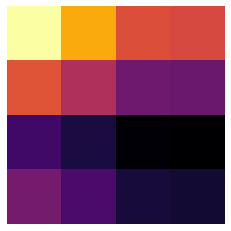

In [20]:
wave.make_matrix()

* You can make and play new matrices
* Lighter squares generate higher-frequency tones while darker squares generate lower-frequency tones

[[260.27655152 326.23104733 542.95381432 284.56284276]
 [256.13348557 321.3032898  535.39819881 280.12876348]
 [427.96125036 526.27246501 849.26779673 464.16008129]
 [368.57657767 455.42888986 740.78834818 400.5565973 ]]


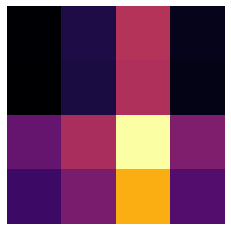

In [21]:
wave.make_play(show=True)

wave.save('wave2.wav')

display(Audio('wave2.wav'))

* We can shift frequencies to closest notes:

In [22]:
wave.to_notes()

wave.save('wave2_tonotes.wav')

display(Audio('wave2_tonotes.wav'))

C4 E4 C#5 C#4 C4 E4 C5 C#4 A4 C5 G#5 A#4 F#4 A#4 F#5 G4 


* Can also change various parameters
* For example, a *bass-y* riff

In [23]:
wave.tempo = 70
wave.central_freq = 100
wave.freq_spread = 'tight'
wave.clip_level = 0.2
wave.make_play()

wave.save('wave3.wav')

display(Audio('wave3.wav'))

* Or a chaotic lead

In [24]:
wave.tempo = 120
wave.central_freq = 500
wave.freq_spread = 'wide'
wave.clip_level = 0.2
wave.make_play()

wave.save('wave4.wav')

display(Audio('wave4.wav'))

* If you like it, repeat it or loop it!

[[ 506.5685784  1167.67821135 1045.85927782 1220.1543463 ]
 [  20.          292.49942744  233.13781793  318.0709174 ]
 [ 226.29668589  710.24340593  621.06952175  748.65721344]
 [  20.          327.59637729  265.72994357  354.24672781]]


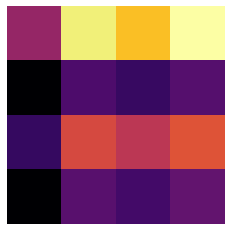

In [25]:
wave.make_play(2, show=True)

wave.save('wave5.wav', 2) # Saved melody 2 times

display(Audio('wave5.wav'))

* Or use it to make some interesting effects

[[ 713.63243065  591.41519231  336.72900565  607.85296713  488.07992095
   450.39914318   20.        ]
 [1461.12286598 1283.44954059  913.20409087 1307.34504639 1133.23032555
  1078.45123825  345.79387818]
 [ 562.77018775  451.74458832  220.38147194  466.68206176  357.87150864
   323.64639642   20.        ]
 [ 959.01615754  818.60168957  525.96115326  837.4932083   699.84830086
   656.56177028   77.52338839]
 [1089.87999444  939.75153686  626.89127049  959.95029193  812.80575722
   766.52636874  147.44288798]
 [1081.37833622  931.87767254  620.33709311  951.99604634  805.47203233
   759.39102798  142.90070566]
 [ 122.67115692   44.29458937   20.           54.83453995   20.
    20.           20.        ]]


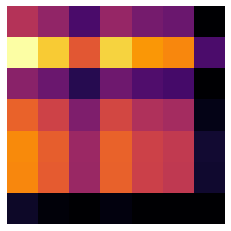

In [26]:
wave.dimension = 7
wave.tempo = 800
wave.central_freq = 567
wave.freq_spread = 'wide'
wave.clip_level = 0.35
wave.make_play(2, show=True)

wave.save('wave6.wav',2)

display(Audio('wave6.wav'))

# Thank you!

* Find project at `github.com/danj7/RandomMatrixMusicMaker/`
* I'll be in the Discord! ✌️